In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sai64\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
sms = pd.read_csv('Spam Data.txt', sep='\t', names=['label','message'])

In [56]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
sms.shape

(5572, 2)

In [58]:
sms.drop_duplicates(inplace=True)

In [59]:
sms.reset_index(drop=True, inplace=True)

In [60]:
sms.shape

(5169, 2)

In [61]:
sms['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

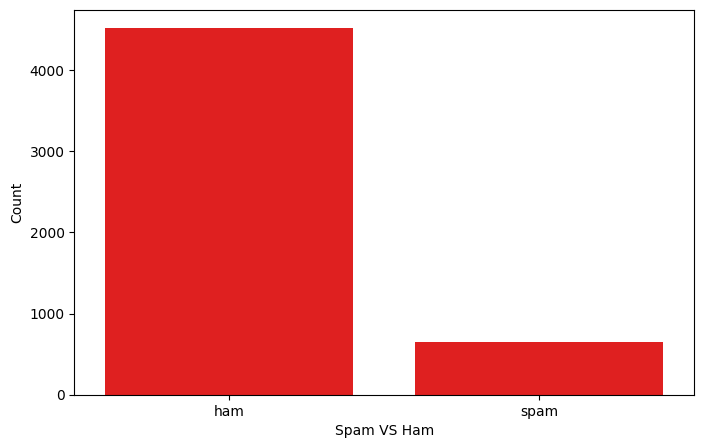

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=sms,color='red')
plt.xlabel('Spam VS Ham')
plt.ylabel('Count')
plt.show()

In [63]:
corpus = []
ps = PorterStemmer()

for i in range(0,sms.shape[0]):
    message = re.sub(pattern='[^A-Za-z]', repl=' ', string=sms.message[i]) 
    message = message.lower() 
    words = message.split() 
    words = [word for word in words if word not in set(stopwords.words('english'))] 
    words = [ps.stem(word) for word in words] 
    message = ' '.join(words) 
    corpus.append(message)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [65]:
y = pd.get_dummies(sms['label'])
y = y.iloc[:, 1].values

In [66]:
y

array([False, False,  True, ..., False, False, False])

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [78]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for Learning ={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with Learning value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

c:\Users\sai64\OneDrive\Desktop\Bharat Intern\venv\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\sai64\OneDrive\Desktop\Bharat Intern\venv\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Accuracy score for Learning =0.0 is: 97.29%
Accuracy score for Learning =0.1 is: 97.78%
Accuracy score for Learning =0.2 is: 97.97%
Accuracy score for Learning =0.3 is: 97.97%
Accuracy score for Learning =0.4 is: 97.97%
Accuracy score for Learning =0.5 is: 97.97%
Accuracy score for Learning =0.6 is: 97.97%
Accuracy score for Learning =0.7 is: 97.97%
Accuracy score for Learning =0.8 is: 97.87%
Accuracy score for Learning =0.9 is: 97.87%
Accuracy score for Learning =1.0 is: 97.68%
--------------------------------------------
The best accuracy is 97.97% with Learning value as 0.2


In [69]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [70]:
y_pred = classifier.predict(X_test)

In [71]:
y_pred

array([False, False, False, ..., False, False, False])

In [72]:
acc_s = accuracy_score(y_test, y_pred)*100

In [73]:
print("Accuracy Score {} %".format(round(acc_s,2)))

Accuracy Score 97.78 %


In [74]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [75]:
result = ['Wait a minute, this is a SPAM!','Ohhh, this is a normal message.']

In [87]:
print('Enter your message here: ')
msg=input()
print(msg)
if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Enter your message here: 
Hey J Sai Nath Reddy, You have been selected for the Virtual Internship Program at Bharat Intern. Kindly upload your welcome letter on our LinkedIn page BharatIntern and tag us.
Ohhh, this is a normal message.
